In [1]:
import glacierml as gl
import configparser
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
# import sys
cols = []
for i in range(273):
    cols.append(i)
# !{sys.executable} -m pip install basemap

2024-04-02 14:06:07.634562: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 14:06:07.680557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 14:06:08.417777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Let's look at how we compare to Farinotti et al. 2019

In [2]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
E_A = df['Area']
E_H = np.mean(df[cols],axis = 1)
si = df['sig_k_ind'] # = (Var(H)*Var(A) + A^2Var(H) + H^2Var(A))

sp = np.sum(si)

se = np.sqrt(sp)

Z = (1.96)
Vlb = np.round( (np.sum(E_H * E_A) - (Z*se)) , 0) / 1e3
Vub = np.round( (np.sum(E_H * E_A) + (Z*se)) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

[133.212,138.101]  * 10^3 km^3
Mid CI: 135.656 * 10^3 km^3
CI Half Width: 2.445 * 10^3 km^3


#### Okay, that is our global sum. Now lets look at our global sum when just comparing to Farinotti 

In [3]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df_r.pkl')
E_A = df['Area']
E_H = np.mean(df[cols],axis = 1)
si = df['sig_k_ind'] # = (Var(H)*Var(A) + A^2Var(H) + H^2Var(A))

sp = np.sum(si)

se = np.sqrt(sp)

Z = (1.96)
Vlb = np.round( (np.sum(E_H * E_A) - (Z*se)) , 0) / 1e3
Vub = np.round( (np.sum(E_H * E_A) + (Z*se)) , 0) / 1e3

print(f'[{Vlb},{Vub}]  * 10^3 km^3')

print(f'Mid CI: {np.round((Vub + Vlb) / 2,3)} * 10^3 km^3')

print(f'CI Half Width: {np.round((Vub - Vlb) / 2,3)} * 10^3 km^3')

[119.584,124.116]  * 10^3 km^3
Mid CI: 121.85 * 10^3 km^3
CI Half Width: 2.266 * 10^3 km^3


#### We lost $13.806 \times 10^3 \text{km}^3$ of ice when comparing to Farinotti, $\approx 10\%$ decrease
#### Our uncertainty also decreased by $\approx 7\%$ from 2.445 to 2.266 $\times 10^3 \text{km}^3$ of ice
#### How do the discrepancies between this study and Farinotti stack up?


In [4]:
#### TOTAL DIFFERENCE IN GLOBAL VOLUMES ####
t = (
    np.sum(np.mean(df[cols],axis = 1) * df['Area']) - np.sum(df['FMT'] / 1e3 * df['Area'])
) / 1e3
print(t)

-27.618465470232245


#### We are looking fo $\approx 28 \times 10^3 \text{km}^3$

Text(0.5, 1.0, 'Cumulative Sum Difference of Volumes')

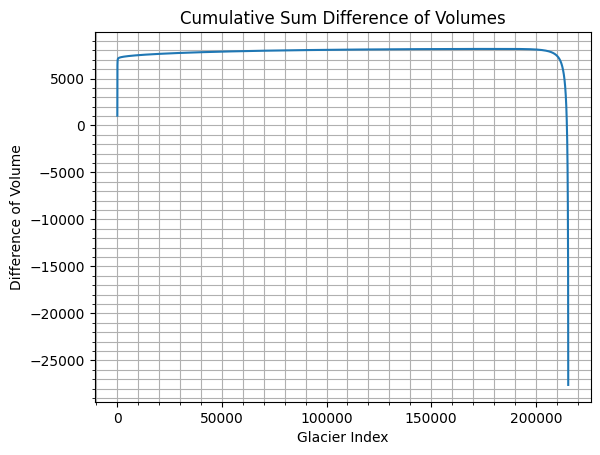

In [5]:
running_sum = np.cumsum(
    df['r'].sort_values(ascending = False).reset_index().drop('index',axis = 1)
)
running_sum.index = range(1, len(running_sum) + 1)

plt.plot(running_sum)
plt.minorticks_on()
plt.grid(which = 'both')
plt.xlabel('Glacier Index')
plt.ylabel('Difference of Volume')
plt.title('Cumulative Sum Difference of Volumes')

#### Okay, so we have a handful of large positive and large negative discrepancies. 
#### What do they look like close up?

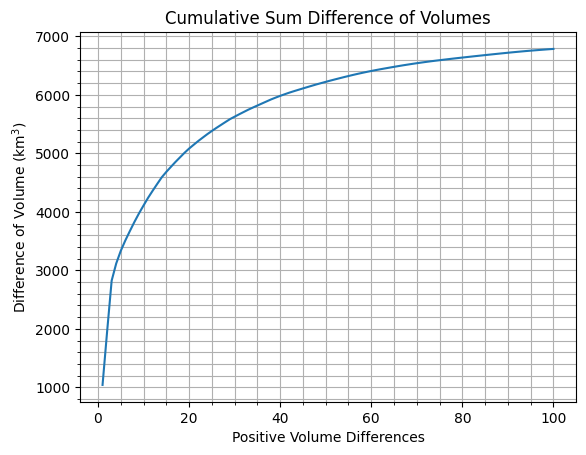

In [6]:
running_sum1 = np.cumsum(
    df['r'].sort_values(ascending = False).reset_index().drop('index',axis = 1)
)
running_sum1.index = range(1, len(running_sum1) + 1)

plt.plot(running_sum1[0:100])
plt.minorticks_on()
plt.grid(which = 'both')
# plt.xscale('log')
plt.xlabel('Positive Volume Differences')
plt.ylabel('Difference of Volume (km$^3$)')
plt.title('Cumulative Sum Difference of Volumes')
plt.show()

Text(0.5, 1.0, 'Cumulative Sum Difference of Volumes')

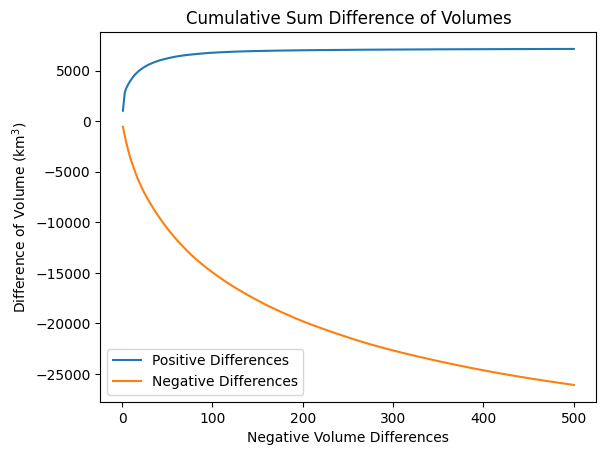

In [15]:
running_sum2 = np.cumsum(
    df['r'].sort_values(ascending = True).reset_index().drop('index',axis = 1)
)
running_sum2.index = range(1, len(running_sum2) + 1)
plt.plot(running_sum1[0:500],label = 'Positive Differences')

plt.plot(running_sum2[0:500],label = 'Negative Differences')
# plt.minorticks_on()
# plt.grid(which = 'both')
# plt.xscale('log')
plt.legend()
plt.xlabel('Negative Volume Differences')
plt.ylabel('Difference of Volume (km$^3$)')
plt.title('Cumulative Sum Difference of Volumes')

In [17]:
counts = []
percs = []
n = 0
for i in range(10,600,10):
#     print(i)
    n =+ i
    print(n*2)
    df1 = df.sort_values('r', ascending=True).head(n)
    df2 = df.sort_values('r', ascending=True).tail(n)
    percent_of_df = np.round((n*2) / len(df) * 100,4)
    print(f'Percent of global glaciers considered = {percent_of_df}')

    neg = (np.sum(df1['r']) / 1e3)
#     print(neg)

    pos = (np.sum(df2['r']) / 1e3)
    d = abs(pos + neg) / (-t) * 100
    percs.append(d)
    counts.append(percent_of_df)
    print(f'Volume Difference contained = {d}')
    print('')

20
Percent of global glaciers considered = 0.0093
Volume Difference contained = 0.8936542468820354

40
Percent of global glaciers considered = 0.0186
Volume Difference contained = 4.10354297980266

60
Percent of global glaciers considered = 0.0278
Volume Difference contained = 8.371065764040484

80
Percent of global glaciers considered = 0.0371
Volume Difference contained = 12.208332375021499

100
Percent of global glaciers considered = 0.0464
Volume Difference contained = 15.83405388437229

120
Percent of global glaciers considered = 0.0557
Volume Difference contained = 19.074008353583103

140
Percent of global glaciers considered = 0.065
Volume Difference contained = 22.067096664263456

160
Percent of global glaciers considered = 0.0742
Volume Difference contained = 24.830786897048345

180
Percent of global glaciers considered = 0.0835
Volume Difference contained = 27.311519164214697

200
Percent of global glaciers considered = 0.0928
Volume Difference contained = 29.574604514982006


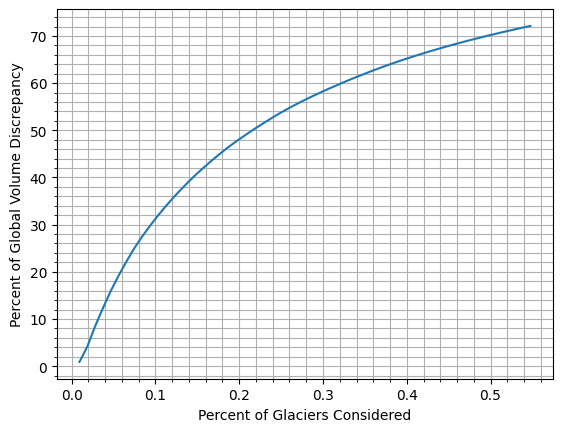

In [18]:
plt.plot(counts,percs)
plt.xlabel('Percent of Glaciers Considered')
plt.ylabel('Percent of Global Volume Discrepancy')
plt.minorticks_on()
plt.grid(which = 'both')

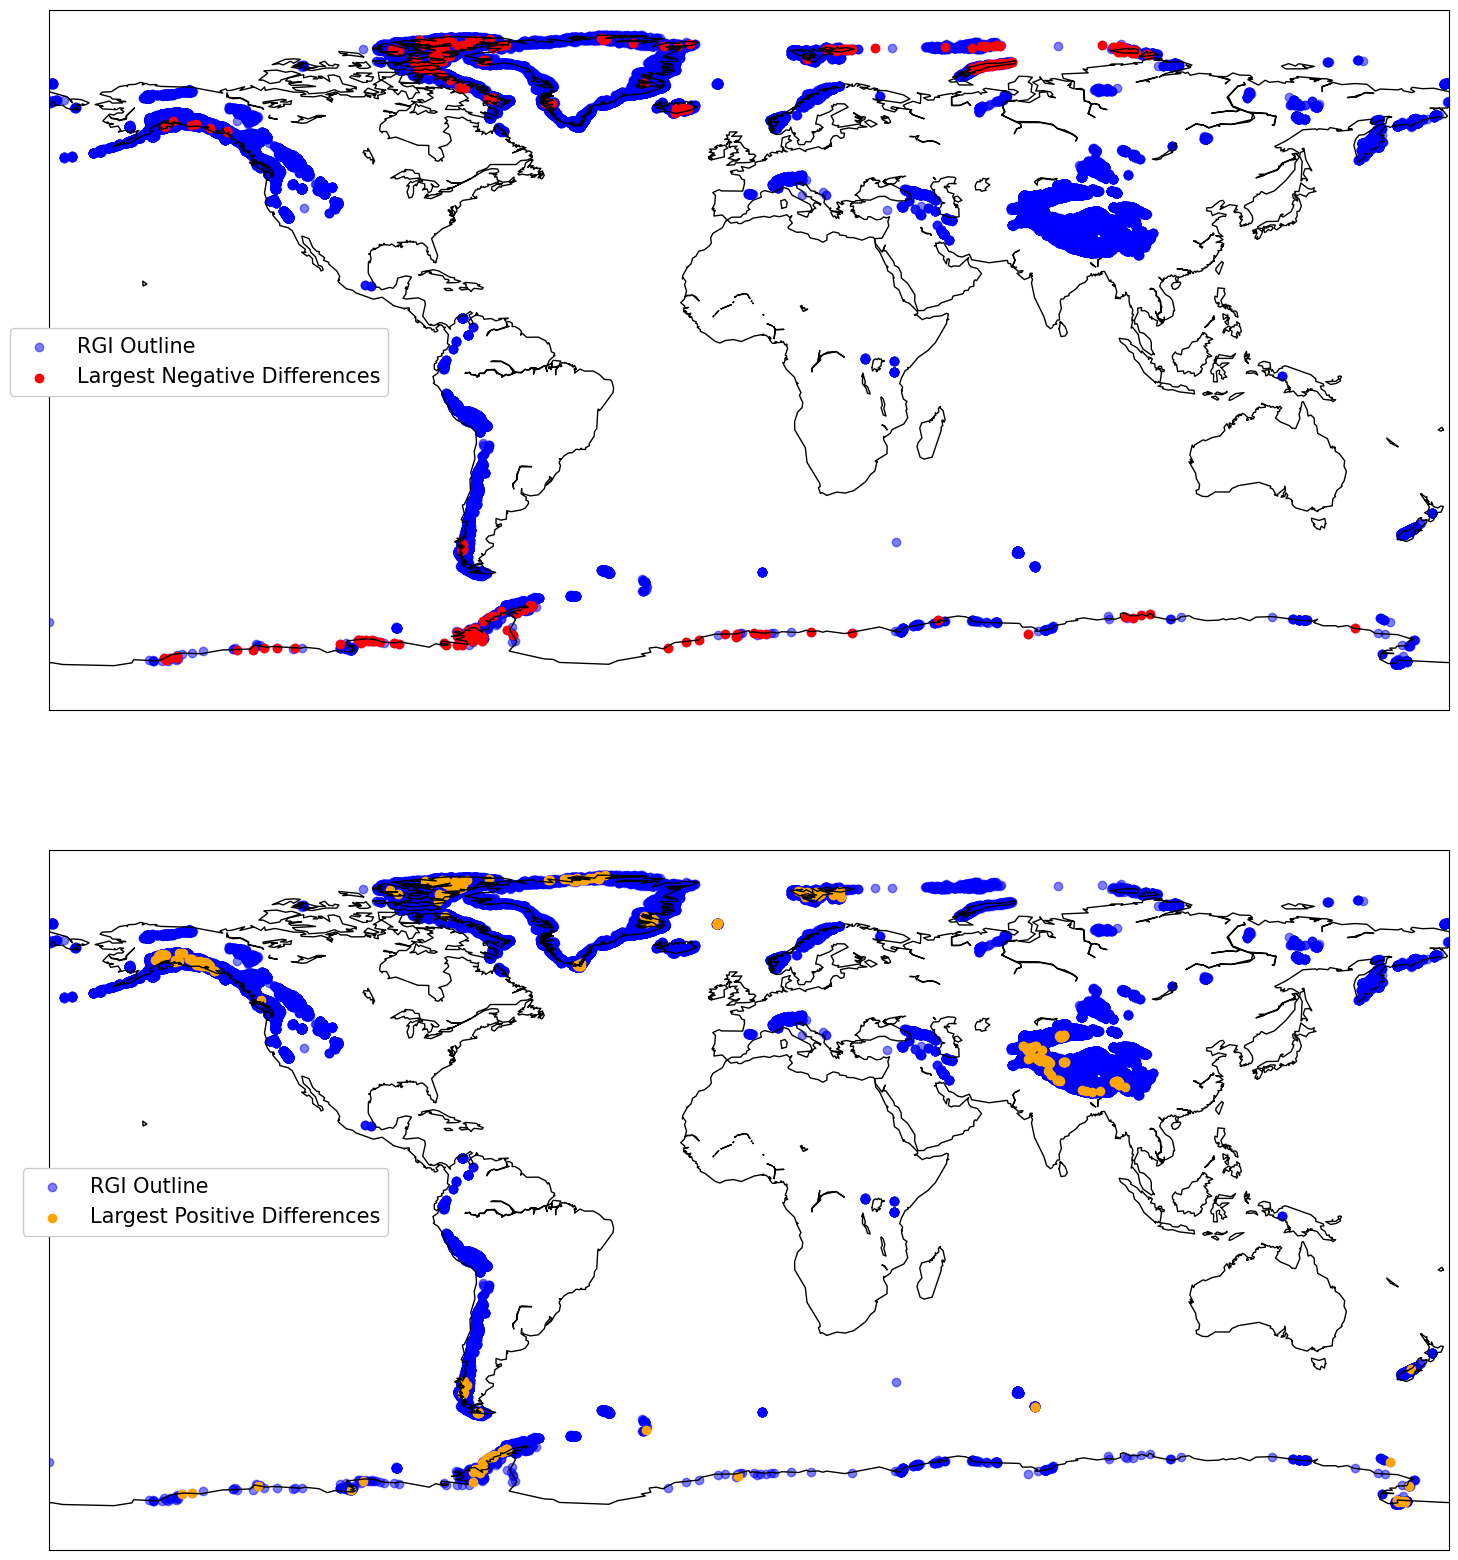

In [16]:
# Assuming gl.load_RGI() returns RGI DataFrame
RGI = gl.load_RGI()

# Example DataFrames df1 and df2
# Assuming they have columns 'CenLon' and 'CenLat'
# Assuming 'r' column exists in df DataFrame

# Sort df based on 'r' column and select top 1000 and bottom 1000 rows
# df1 = df.sort_values('r', ascending=True).head(300)
# df2 = df.sort_values('r', ascending=True).tail(300)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Plot for df1 (top plot)
ax1 = axes[0]
m1 = Basemap(projection='cyl', ax=ax1, resolution='c')
m1.scatter(RGI['CenLon'], RGI['CenLat'], c='blue', alpha=0.5, label='RGI Outline')

m1.scatter(df1['CenLon'], df1['CenLat'], c='red', alpha=1, label='Largest Negative Differences')
m1.drawcoastlines()
ax1.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

# Plot for df2 (bottom plot)
ax2 = axes[1]
m2 = Basemap(projection='cyl', ax=ax2, resolution='c')
m2.scatter(RGI['CenLon'], RGI['CenLat'], c='blue', alpha=0.5, label='RGI Outline')

m2.scatter(df2['CenLon'], df2['CenLat'], c='orange', alpha=1, label='Largest Positive Differences')
m2.drawcoastlines()
ax2.legend(bbox_to_anchor=(0.25, 0.56), facecolor='w', framealpha=1, fontsize=15)

plt.show()